In [2]:
import json
import matplotlib.pyplot as plt 
import torch
import torchvision

from PIL import Image
from pycocotools.coco import COCO
from torch.utils.data import Dataset, DataLoader
from torch.utils.tensorboard import SummaryWriter
from torchvision import datasets, models, transforms, tv_tensors
from torchvision.transforms import v2
from torchvision.models.detection import maskrcnn_resnet50_fpn, MaskRCNN_ResNet50_FPN_Weights
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from typing import Union,TypeVar

In [3]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

device

device(type='cuda')

In [4]:
with open('Datasets/face-h 2.v2i.coco/_annotations.coco.json') as f:
    annotations_dictionary = json.load(f)

annotations_dictionary['images'] = [item for item in annotations_dictionary['images'] if item['height'] == 1024]

annotations_dictionary['annotations'] = [item for item in annotations_dictionary['annotations'] if item['category_id'] in [1,3,8,9]]

list_of_image_ids = [item['image_id'] for item in annotations_dictionary['annotations']]

annotations_dictionary['annotations'] = [item for item in annotations_dictionary['annotations'] if list_of_image_ids.count(item['image_id']) == 1]

annotations_dictionary['images'] = [item for item in annotations_dictionary['images'] if list_of_image_ids.count(item['id']) == 1]

In [5]:
len(annotations_dictionary['images'])

1060

In [6]:
with open('Datasets/face-h 2.v2i.coco/processed_annotations.json', 'w+') as f:
    json.dump(annotations_dictionary, f)

In [7]:
annotations_dictionary['images'][0], annotations_dictionary['categories']

({'id': 1,
  'license': 1,
  'file_name': 'wavy_heart_5_jpg.rf.dac2a9350547c71347978fbaf82a8b84.jpg',
  'height': 1024,
  'width': 1024,
  'date_captured': '2024-02-19T12:55:21+00:00'},
 [{'id': 0, 'name': 'face-hr-oKXz', 'supercategory': 'none'},
  {'id': 1, 'name': 'curly', 'supercategory': 'face-hr-oKXz'},
  {'id': 2, 'name': 'heart_shape', 'supercategory': 'face-hr-oKXz'},
  {'id': 3, 'name': 'kinky', 'supercategory': 'face-hr-oKXz'},
  {'id': 4, 'name': 'oblong_shape', 'supercategory': 'face-hr-oKXz'},
  {'id': 5, 'name': 'oval_shape', 'supercategory': 'face-hr-oKXz'},
  {'id': 6, 'name': 'round_shape', 'supercategory': 'face-hr-oKXz'},
  {'id': 7, 'name': 'square_shape', 'supercategory': 'face-hr-oKXz'},
  {'id': 8, 'name': 'straight', 'supercategory': 'face-hr-oKXz'},
  {'id': 9, 'name': 'wavy', 'supercategory': 'face-hr-oKXz'}])

In [8]:
annotations_dictionary['annotations']

[{'id': 0,
  'image_id': 0,
  'category_id': 8,
  'bbox': [104, 9, 283.508, 211.618],
  'area': 59995.612,
  'segmentation': [[128.798,
    218.991,
    127.909,
    182.536,
    143.906,
    146.08,
    159.015,
    128.297,
    163.459,
    162.974,
    149.239,
    194.095,
    155.46,
    201.208,
    170.569,
    184.314,
    183.011,
    146.97,
    200.786,
    126.519,
    229.226,
    122.962,
    266.553,
    120.295,
    296.77,
    107.847,
    345.651,
    144.302,
    355.427,
    220.769,
    377.645,
    206.543,
    387.421,
    114.071,
    372.313,
    58.054,
    339.429,
    30.491,
    314.545,
    39.382,
    294.104,
    11.818,
    247,
    9.151,
    183.011,
    27.823,
    135.019,
    50.052,
    108.357,
    98.955,
    103.913,
    164.753,
    127.909,
    219.88,
    128.798,
    218.991]],
  'iscrowd': 0},
 {'id': 2,
  'image_id': 1,
  'category_id': 9,
  'bbox': [170, 16, 716, 520],
  'area': 372320,
  'segmentation': [[206,
    303,
    195,
    318,

In [9]:
[item['height'] for item in annotations_dictionary['images']]

[1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,

In [10]:
coco = COCO(annotation_file='Datasets/face-h 2.v2i.coco/processed_annotations.json')

annotation_ids = coco.getAnnIds(imgIds=[1160])

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [11]:
annotations = coco.loadAnns(annotation_ids)

In [12]:
mask_thing = coco.annToMask(annotations[0])
mask_thing

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

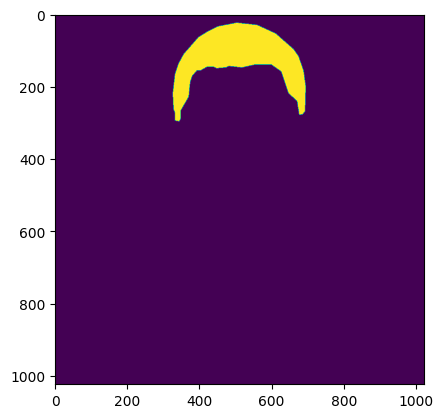

In [13]:
plt.imshow(mask_thing)

plt.show()

In [14]:
class HairDataset(Dataset):
    def __init__(self, images_path, annotations_path) -> None:
        super().__init__()
        self.images_path = images_path
        self.coco = COCO(annotation_file='Datasets/face-h 2.v2i.coco/processed_annotations.json')

        with open(f'{annotations_path}') as file:
            self.raw_dictionary = json.load(file)

        self.list_of_image_dictionaries = self.raw_dictionary['images']

        # Adds all the annotations to the dictionary containing a particular images' details under the key 'list_of_annotations'
        for dict in self.list_of_image_dictionaries:
            dict['list_of_annotations'] = []
            for annotation in self.raw_dictionary['annotations']:
                if annotation['image_id'] == dict['id']:
                    dict['list_of_annotations'].append(annotation)
        
        self.image_transforms = MaskRCNN_ResNet50_FPN_Weights.DEFAULT.transforms()


    def __getitem__(self, index):
        """
        Returns a tuple containing 'Image' and 'Target'
        """
        image_path = f'{self.images_path}' + self.raw_dictionary['images'][index]['file_name']
        with Image.open(image_path) as pil_image:
            image = self.image_transforms(pil_image)
            image = image.float()
        target = {}
        target['area'] = []
        target['bbox'] = []
        target['image_id'] = torch.tensor(self.list_of_image_dictionaries[index]['id'])
        target['labels'] = []
        target['segmentation'] = []
        target['masks'] = []

        annotation_ids = self.coco.getAnnIds(imgIds=[self.list_of_image_dictionaries[index]['id']])
        annotations = self.coco.loadAnns(annotation_ids)
        mask_thing = self.coco.annToMask(annotations[0])

        for annotation in self.list_of_image_dictionaries[index]['list_of_annotations']:
            target['area'].append(annotation['area'])
            target['bbox'].append(annotation['bbox'])
            target['segmentation'].append(annotation['segmentation'])
            target['masks'].append(mask_thing)
            target['labels'].append(annotation['category_id'])
        
        target['masks'] = torch.tensor(target['masks'])
        
        target['area'] = torch.Tensor(target['area']).float()

        # Convert the boxes attribute to tensors and then format it to xyxy from xywh
        target['boxes'] = tv_tensors.BoundingBoxes(target['bbox'], format='xywh', canvas_size=(640, 640))
        target['boxes'] = torchvision.ops.box_convert(target['boxes'],  in_fmt='xywh', out_fmt='xyxy')

        target['labels'] = torch.Tensor(target['labels']).long()

        target.pop('segmentation', None)
        target.pop('bbox', None)

        return (image, target)
    
    def __len__(self):
        return len(self.raw_dictionary['images'])

In [15]:
hair_dataset = HairDataset('Datasets/face-h 2.v2i.coco/train/', 'Datasets/face-h 2.v2i.coco/processed_annotations.json')

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [16]:
len(hair_dataset)

1060

In [17]:
hair_train, hair_validation, hair_test = torch.utils.data.random_split(hair_dataset, [0.7, 0.15,0.15])

len(hair_train), len(hair_validation), len(hair_test)

(742, 159, 159)

In [18]:
hair_dataloader = torch.utils.data.DataLoader(
    hair_dataset,
    batch_size = 6,
    collate_fn=lambda batch: tuple(zip(*batch))
)

In [19]:
image, target = hair_dataset[0]

image, target

/tmp/ipykernel_19116/1844831790.py:49: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  target['masks'] = torch.tensor(target['masks'])


(tensor([[[0.9961, 0.9961, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [0.9961, 0.9961, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961]],
 
         [[0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          ...,
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961]],
 
         [[0.9961, 0.9961, 0.9882,  ..., 0.9882, 0.9882, 0.9882],
          [0.9961, 0.9961, 0.9882,  ..., 0.9882, 0.9882, 0.9882],
          [0.9961, 0.9961, 0.9961,  ...,

In [20]:
def show_bounding_boxes(image, bounding_boxes:tv_tensors.BoundingBoxes):
    if type(image) == Image.Image:
        transformer = v2.ToImage()
        image = transformer(image)
    image = image.byte()
    annotated_image_tensor = torchvision.utils.draw_bounding_boxes(image, bounding_boxes, colors='green')
    plt.imshow(transforms.functional.to_pil_image(annotated_image_tensor))
    plt.axis('off')
    plt.show()

In [21]:
#show_bounding_boxes(image, target['boxes'])

### Test case:

In [22]:
def show_images_with_annotation(image, annotation):
    plt.imshow(image)
    coco.showAnns(annotation, draw_bbox=True)
    plt.axis('off')
    plt.show()

In [23]:
model = models.get_model("maskrcnn_resnet50_fpn_v2", weights="MaskRCNN_ResNet50_FPN_V2_Weights.DEFAULT")
num_classes = 2
in_features = model.roi_heads.box_predictor.cls_score.in_features
#model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

In [24]:
hair_batch = next(iter(hair_dataloader))

hair_image, hair_target = hair_batch

hair_image, hair_target

((tensor([[[0.9961, 0.9961, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           [0.9961, 0.9961, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           [0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
           ...,
           [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
           [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
           [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961]],
  
          [[0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
           [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
           [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
           ...,
           [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
           [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
           [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961]],
  
          [[0.9961, 0.9961, 0.9882,  ..., 0.9882, 0.9882, 0.9882],
           [0.9961, 0.9961, 0.9882,  ..., 0.9882, 0.9882, 0.9882],
           [0.9961, 0.

In [25]:
model.eval()

hair_predictions = model(hair_image)

hair_predictions[0]

{'boxes': tensor([[  26.2033,   24.4269,  912.7592, 1011.4720]],
        grad_fn=<StackBackward0>),
 'labels': tensor([1]),
 'scores': tensor([0.9988], grad_fn=<IndexBackward0>),
 'masks': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]]], grad_fn=<UnsqueezeBackward0>)}

In [26]:
model.train()

output = model(hair_image, hair_target)

output

{'loss_classifier': tensor(0.3382, grad_fn=<NllLossBackward0>),
 'loss_box_reg': tensor(0.0807, grad_fn=<DivBackward0>),
 'loss_mask': tensor(1.0243, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
 'loss_objectness': tensor(0.0241, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
 'loss_rpn_box_reg': tensor(0.0063, grad_fn=<DivBackward0>)}

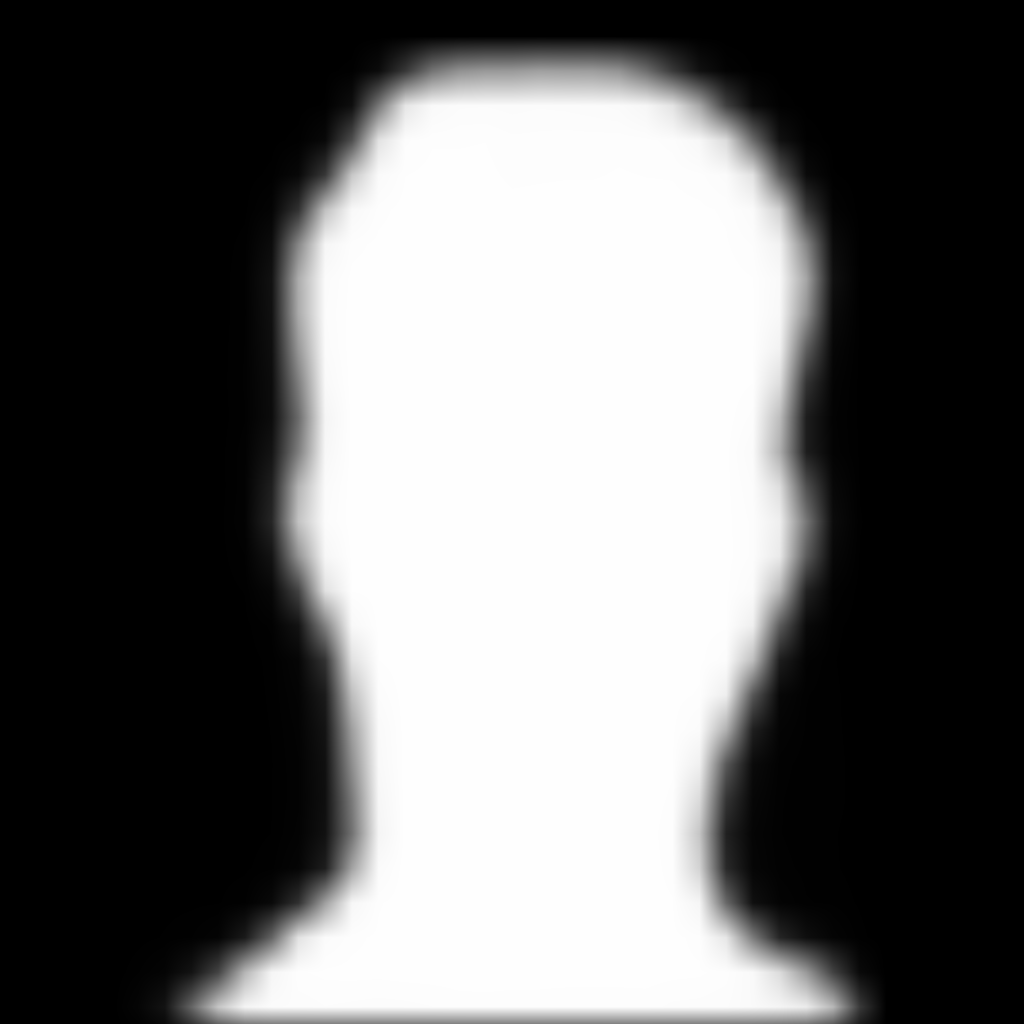

In [27]:
new_masks = hair_predictions[3]['masks'][0]
new_masks = new_masks.squeeze(1)

torchvision.transforms.functional.to_pil_image(new_masks)

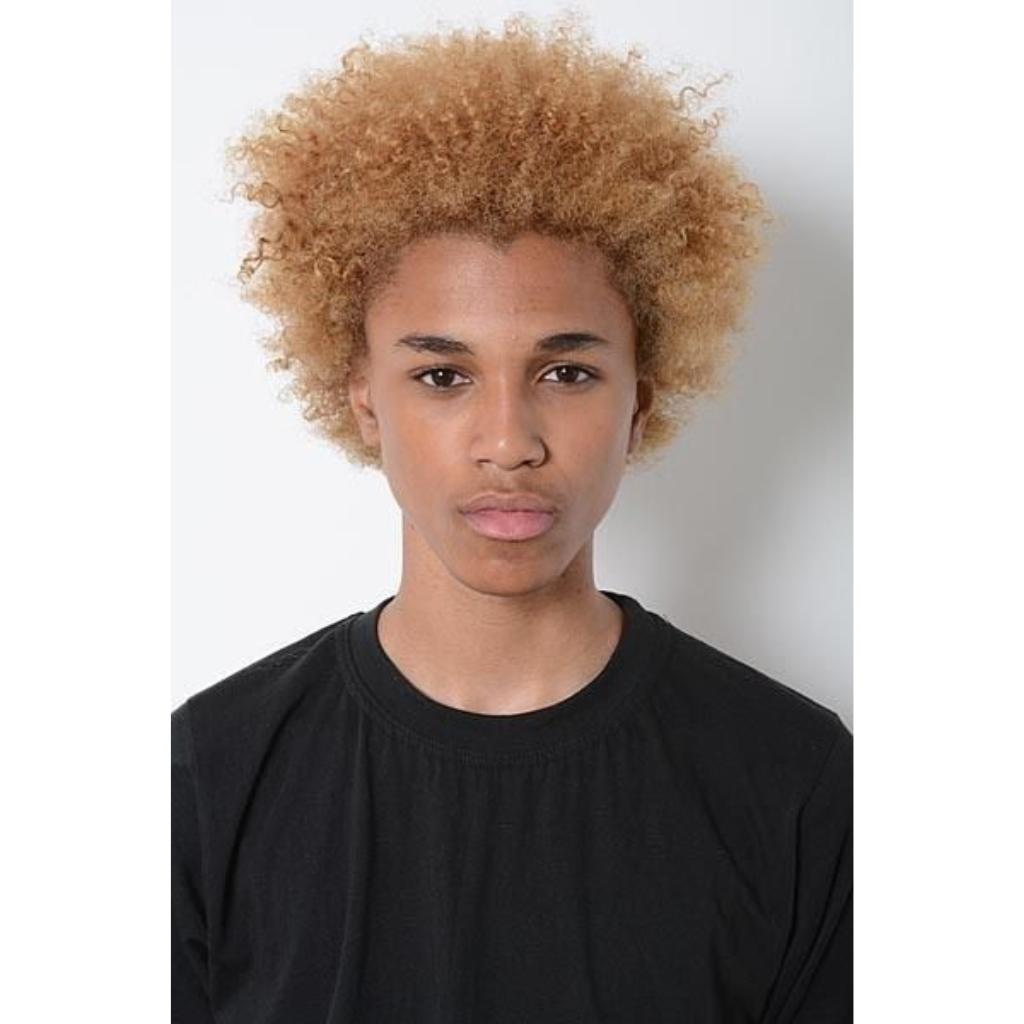

In [28]:
back_image = torchvision.transforms.functional.to_pil_image(hair_image[4])
back_image

In [29]:
# The training loop. Takes in a model, the training and validation data loaders, the number of epochs and the initial learning rate
def train(model, train_loader, validation_loader, epochs = 10, learning_rate = 0.01, model_name:str = "My Model"):

    torch.cuda.empty_cache()

    # Set the optimiser to be an instance of the stochastic gradient descent class
    parameters = [p for p in model.parameters() if p.requires_grad]
    optimiser = torch.optim.SGD(parameters, lr=learning_rate)

    # Define a learning rate scheduler as an instance of the ReduceLROnPlateau class
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimiser, mode='min', patience=50, cooldown=7, eps=1e-20)

    # Writer will be used to track model performance with TensorBoard
    writer = SummaryWriter()

    # Keep track of the number of batches to plot model performace against
    batch_index = 0

    # Loop over the number of epochs
    for epoch in range(epochs):

        # Within each epoch, we pass through the entire training data in batches indexed by batch
        for batch in train_loader:
            # Loads features and labels into device for performance improvements
            features, labels = batch

            model.train()
            
            features = list(img.to(device) for img in features)
            labels = [{k: v.to(device) for k, v in t.items()} for t in labels]

            loss_dict = model(features, labels)

            # Calculate the loss via cross_entropy
            loss = sum(loss for loss in loss_dict.values())

            # Create the grad attributes
            loss.backward() 

            # Clip the loss value so it doesn't become NaN
            torch.nn.utils.clip_grad_norm_(parameters, 4)

            # Print the performance
            print(f"Epoch: {epoch}, batch index: {batch_index}, learning rate: {scheduler.get_last_lr()}, loss:{loss.item()}")

            # Perform one step of stochastic gradient descent
            optimiser.step()

            # Zero the gradients (Apparently set_to_none=True imporves performace)
            optimiser.zero_grad(set_to_none=True)

            # Feed the loss amount into the learning rate scheduler to decide the next learning rate
            scheduler.step(loss.item())

            # Write the performance to the TensorBoard plot
            writer.add_scalar('loss', loss.item(), batch_index)

            # Increment the batch index
            batch_index += 1

            print(torch.cuda.memory_allocated())
            torch.cuda.memory_summary()
            torch.cuda.empty_cache()
    print(f"Saving model as {model_name}.pt")
    torch.save(model.state_dict(), f'{model_name}.pt')
        

def accuracy_score_from_valiadation(model, validation_loader):
    """
    Calculates the accuracy using the WHOLE of the validation dataset.
    """
    with torch.no_grad():
        losses = torch.zeros(0).to(device)

        for batch_index, batch in enumerate(validation_loader):

            features, labels = batch

            model.train()
            #print(labels, labels.keys())

            features = list(img.to(device) for img in features)
            labels = [{k: v.to(device) for k, v in t.items()} for t in labels]

            model.to(device)

            loss_dict = model(features, labels)
            loss = sum(loss for loss in loss_dict.values())

            losses = torch.cat((losses, loss.view(1)))

        accuracy_score = torch.sum(losses) / len(losses)

        return accuracy_score

In [35]:
model.to(device)

train(model, hair_dataloader, hair_dataloader, epochs=1)

Epoch: 0, batch index: 0, learning rate: [0.01], loss:1.4615613222122192
288767488
Epoch: 0, batch index: 1, learning rate: [0.01], loss:1.0844923257827759
288767488
Epoch: 0, batch index: 2, learning rate: [0.01], loss:0.953913152217865
288767488
Epoch: 0, batch index: 3, learning rate: [0.01], loss:0.8406847715377808
288767488
Epoch: 0, batch index: 4, learning rate: [0.01], loss:1.1166541576385498
288767488
Epoch: 0, batch index: 5, learning rate: [0.01], loss:0.8346474170684814
288767488
Epoch: 0, batch index: 6, learning rate: [0.01], loss:0.9896336197853088
288767488
Epoch: 0, batch index: 7, learning rate: [0.01], loss:0.9927807450294495
288767488
Epoch: 0, batch index: 8, learning rate: [0.01], loss:0.6854448318481445
288767488
Epoch: 0, batch index: 9, learning rate: [0.01], loss:0.8409255146980286
288767488
Epoch: 0, batch index: 10, learning rate: [0.01], loss:0.7208825945854187
288767488
Epoch: 0, batch index: 11, learning rate: [0.01], loss:0.7488574981689453
288767488
Epo

In [ ]:
model.to('cpu')

model.eval()

hair_predictions = model(hair_image)

hair_predictions[0]

: 

In [33]:
booleans = [0.5 < item for item in hair_predictions[3]['masks']]

stacked = torch.stack(booleans)

mask = torch.sum(stacked, dim=0)

mask = mask.apply_(lambda x: x > 0).bool()

mask

tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]]])

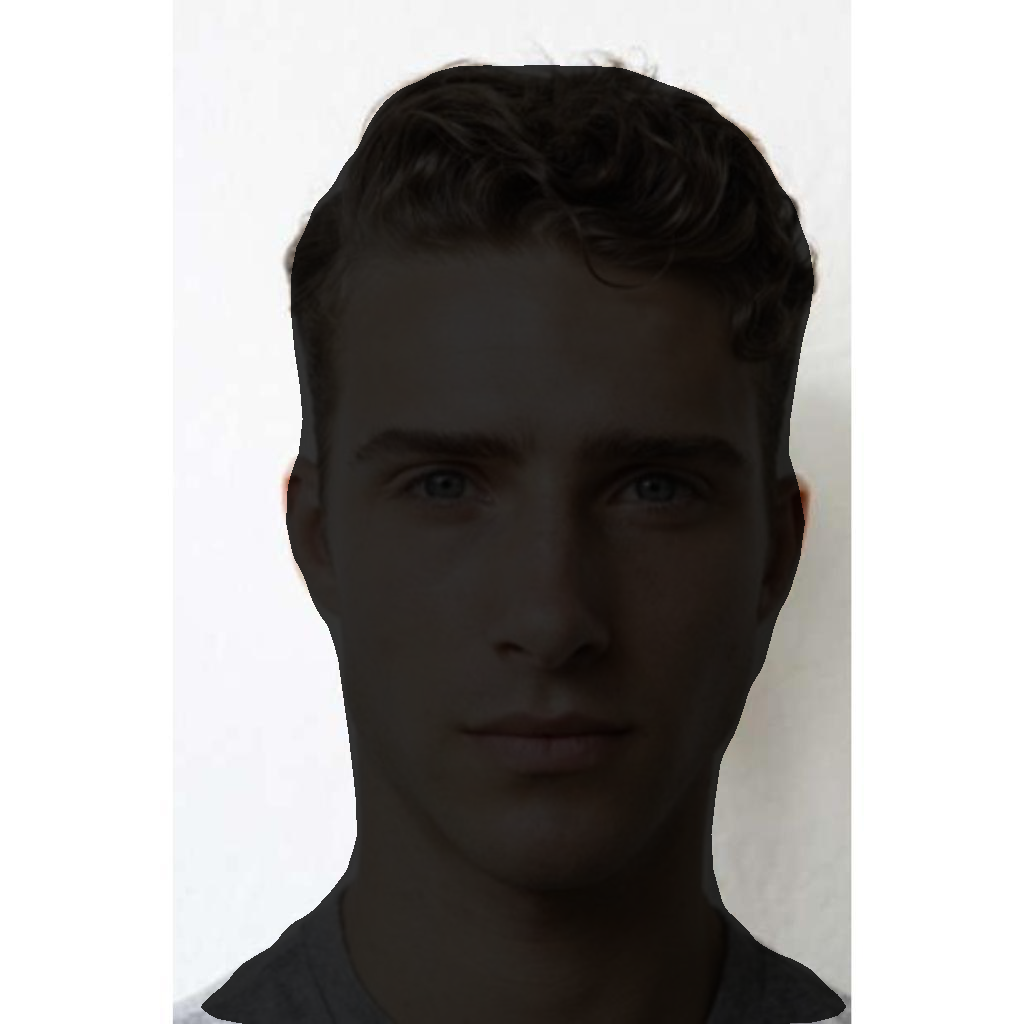

In [34]:
new_masks = torchvision.utils.draw_segmentation_masks(hair_image[3], mask)

torchvision.transforms.functional.to_pil_image(new_masks)


In [64]:
valid_loader = DataLoader(dataset=hair_validation, batch_size=2, collate_fn=lambda batch: tuple(zip(*batch)))

im, tar = next(iter(valid_loader))

tar

({'area': tensor([448346.]),
  'image_id': tensor(302),
  'labels': tensor([9]),
  'masks': tensor([[[0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           ...,
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8),
  'boxes': tensor([[192,  12, 938, 613]])},
 {'area': tensor([235188.]),
  'image_id': tensor(49),
  'labels': tensor([1]),
  'masks': tensor([[[0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           ...,
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8),
  'boxes': tensor([[228,   8, 792, 425]])})

In [65]:
accuracy_score_from_valiadation(model, hair_dataloader)

tensor(0.5313, device='cuda:0')